In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('csv-files/economic_index.csv')
df.drop(columns = ["Unnamed: 0","year", "month"], inplace=True)

X = df[["interest_rate", "unemployment_rate"]]
y = df["index_price"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=42)


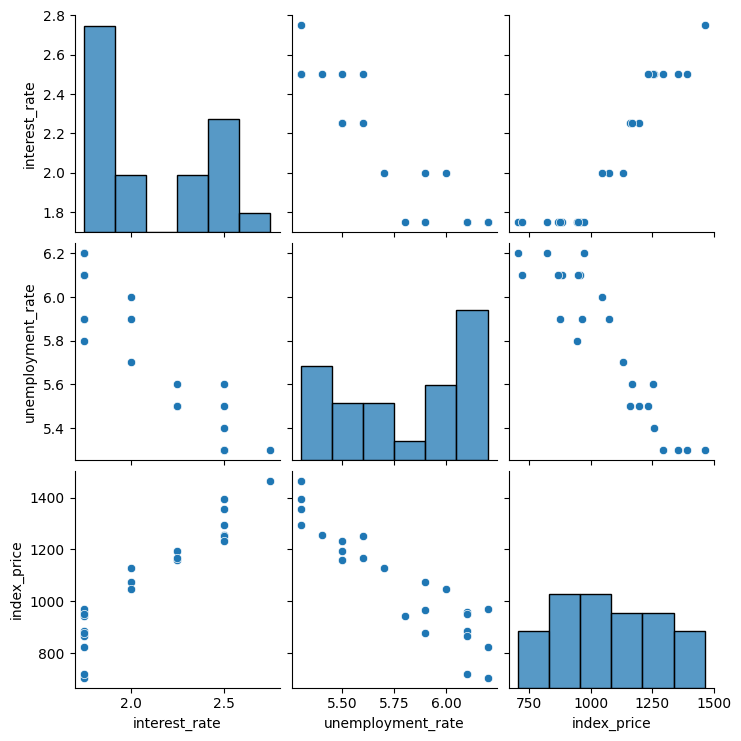

In [18]:
sns.pairplot(df)

In [19]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: xlabel='interest_rate', ylabel='index_price'>

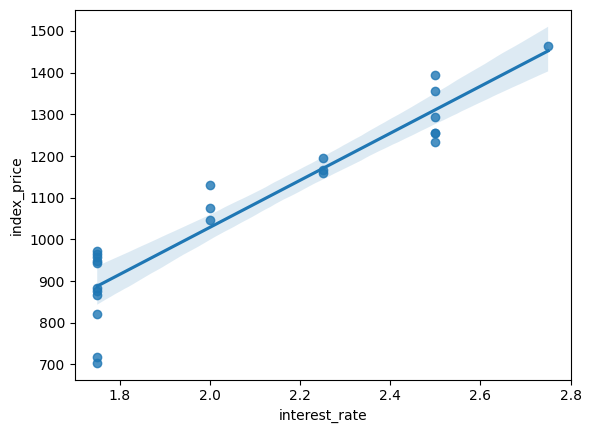

In [23]:
sns.regplot(x = df['interest_rate'],y = df['index_price'])
#sns.regplot(x = df['unemployment_rate'],y = df['index_price'])

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train,y_train)

print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)


Coefficients: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [30]:
#Cross Validation

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3)
validation_score = np.mean(validation_score)
validation_score

np.float64(-5914.828180162388)

In [34]:
#Pred
y_pred = regression.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

score = r2_score(y_test, y_pred)

#adjusted r score
Adjusted = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("R2: ", score)
print("Adjusted R2: ", Adjusted)


8108.567426306613
73.804449323371
90.04758423359625
R2:  0.7591371539010254
Adjusted R2:  0.5985619231683756


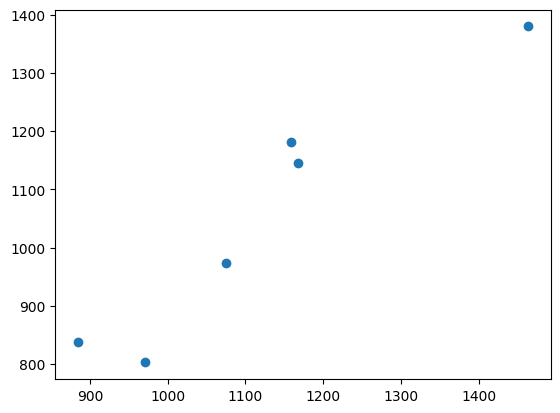

In [36]:
#Analysis

plt.scatter(y_test, y_pred)

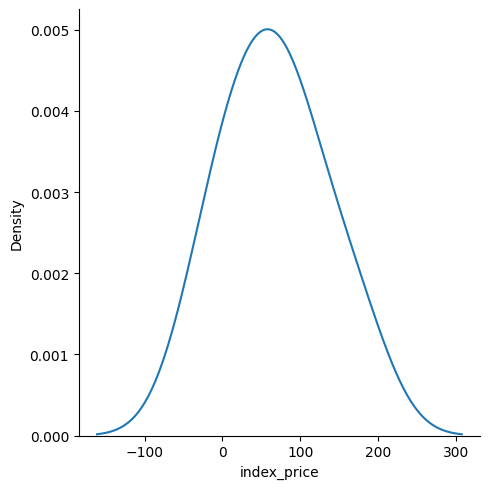

In [37]:
residuals = y_test - y_pred

sns.displot(residuals,kind = 'kde')